# Correlações, causalidade e relações entre genes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
experimentos = pd.read_csv(url, compression='zip')
experimentos

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [2]:
mapa = {'droga':'composto'}
for coluna in experimentos.columns:
    if coluna != 'droga':
        mapa[coluna] = coluna.replace("-", "")
experimentos.rename(columns=mapa, inplace=True)
experimentos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


### Relacionando variáveis 
### (Agrupamento com pandas.groubpby() e tabulação cruzada com pandas.crosstabs())
Para fazer um primeiro cruzamento das variáveis, será feito um gáfico de frequência. Uma das formas de fazer uma tabela de frequência é o crosstab do pandas.

In [3]:
pd.crosstab(experimentos['dose'], experimentos['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [4]:
pd.crosstab([experimentos['dose'], experimentos['tempo']], experimentos['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [5]:
pd.crosstab([experimentos['dose'], experimentos['tempo']], experimentos['tratamento'], values=experimentos['g0'], aggfunc='mean')
# Analisando a média dos genes 0 das culturas classificando-as por meio do cruzamento das variáveis. 

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

## Desafio 1 - Criar tabelas de frequências com o pandas.groupby()

In [6]:
multindex_tempo_dose = experimentos.groupby(['tempo','dose'])
multindex_tempo_dose['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
tempo dose                         
24    D1             301       3585
      D2             305       3581
48    D1             343       4011
      D2             305       3591
72    D1             307       3600
      D2             305       3580

## Desafio 2 - Normalizar o crosstab pela coluna

In [7]:
pd.crosstab(index=[experimentos['dose'], experimentos['tempo']], columns=experimentos['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 3 - Explorar outros agregadores

In [8]:
pd.crosstab([experimentos['tempo'], experimentos['dose']], experimentos['tratamento'], values=experimentos['g0'], aggfunc='std')

tratamento  com_controle  com_droga
tempo dose                         
24    D1        0.751395   1.461954
      D2        0.836626   1.044999
48    D1        0.853396   1.693903
      D2        0.836845   1.315476
72    D1        0.769294   1.458600
      D2        0.878041   1.451532

In [9]:
pd.crosstab([experimentos['tempo'], experimentos['dose']], experimentos['tratamento'], values=experimentos['g0'], aggfunc='sum')

tratamento  com_controle  com_droga
tempo dose                         
24    D1        -75.7799  1319.2648
      D2          3.2800   412.7202
48    D1        -42.1113  1654.4150
      D2          4.0180   770.1980
72    D1        -90.6483  1030.5010
      D2         21.4262   907.3112

## Desafio 4 - Explorar o melt
O pandas.melt() é um método da biblioteca pandas que tem por função transformar o formato de um DataFrame de amplo para longo.

In [10]:
melt = pd.melt(experimentos, id_vars=['tempo','dose'], value_vars=['composto'])
melt

,tempo,dose,variable,value
0,24,D1,composto,b68db1d53
1,72,D1,composto,df89a8e5a
2,48,D1,composto,18bb41b2c
3,48,D1,composto,8c7f86626
4,72,D2,composto,7cbed3131
...,...,...,...,...
23809,24,D2,composto,df1d0a5a1
23810,24,D2,composto,ecf3b6b74
23811,48,D2,composto,cacb2b860
23812,24,D1,composto,8b87a7a83


In [11]:
melt = melt.groupby('value')
melt.get_group('00199ff52')

,tempo,dose,variable,value
8042,48,D2,composto,00199ff52
19724,24,D1,composto,00199ff52
20295,72,D1,composto,00199ff52
21359,72,D2,composto,00199ff52
21435,48,D1,composto,00199ff52
23697,24,D2,composto,00199ff52


### Diagrama de dispersão (scatter plot)

O diagrama de dispersão ou gráfico de dispersão é uma ferramenta gráfica que permite a visualização da correlação entre duas variáveis. Essa visualização é possível pois uma variável assume o eixo x e outra assume o eixo y tornando fácil a identificação de qual tipo de correlação as variáveis estabelecem entre si.

<img src='https://www.flai.com.br/wp-content/uploads/2020/07/cor.png'>

**Fonte da imagem:** https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/ 

### Correlação dos genes g0 e g100 de todas  as culturas

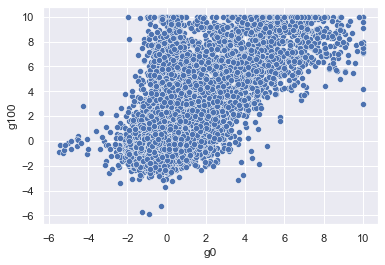

In [12]:
sns.scatterplot(data=experimentos, x='g0', y='g100')
plt.show()

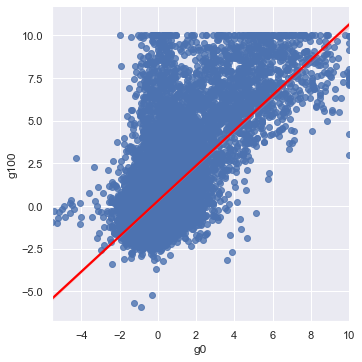

In [13]:
sns.lmplot(data=experimentos, x='g0', y='g100', line_kws={'color':'red'})
plt.show()

### Comparação da correlação entre os genes g0 e g100 das culturas para cada tempo

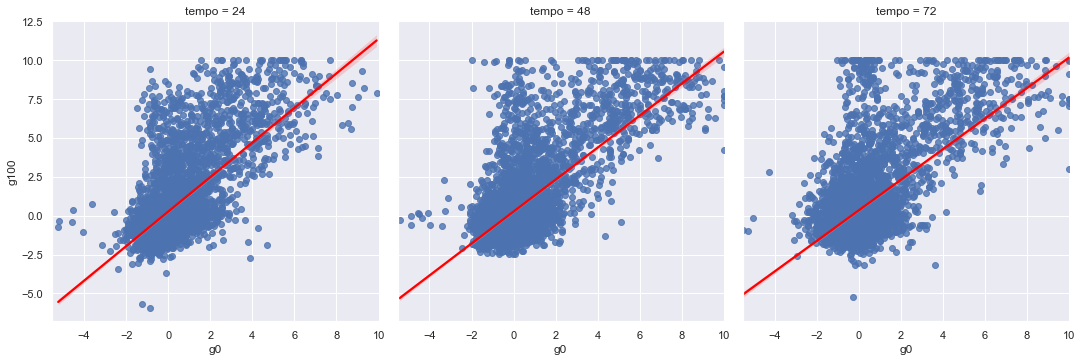

In [14]:
sns.lmplot(data=experimentos, x='g0', y='g100', line_kws={'color':'red'}, col='tempo')
plt.show()

### Comparação da correlação entre os genes g0 e g100 das culturas para cada dose

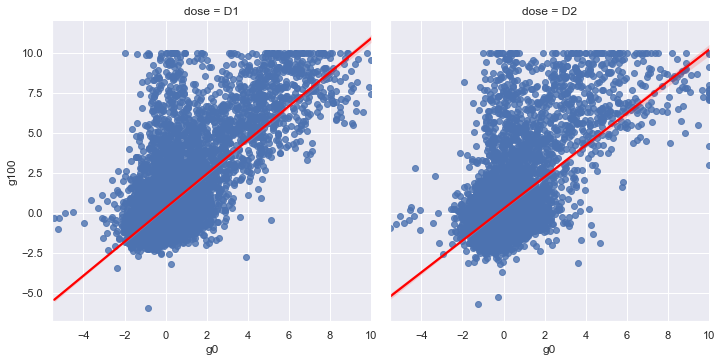

In [15]:
sns.lmplot(data=experimentos, x='g0', y='g100', line_kws={'color':'red'}, col='dose')
plt.show()

É possível notar que o tempo cujas culturas foram submetidas, assim como suas dosagens não tem grande influência na correlação entre os genes 0 e 100. O cenário já muda quando compara-se o tipo de tratamento.

### Comparação da correlação entre os genes g0 e g100 das culturas para cada tipo de tratamento

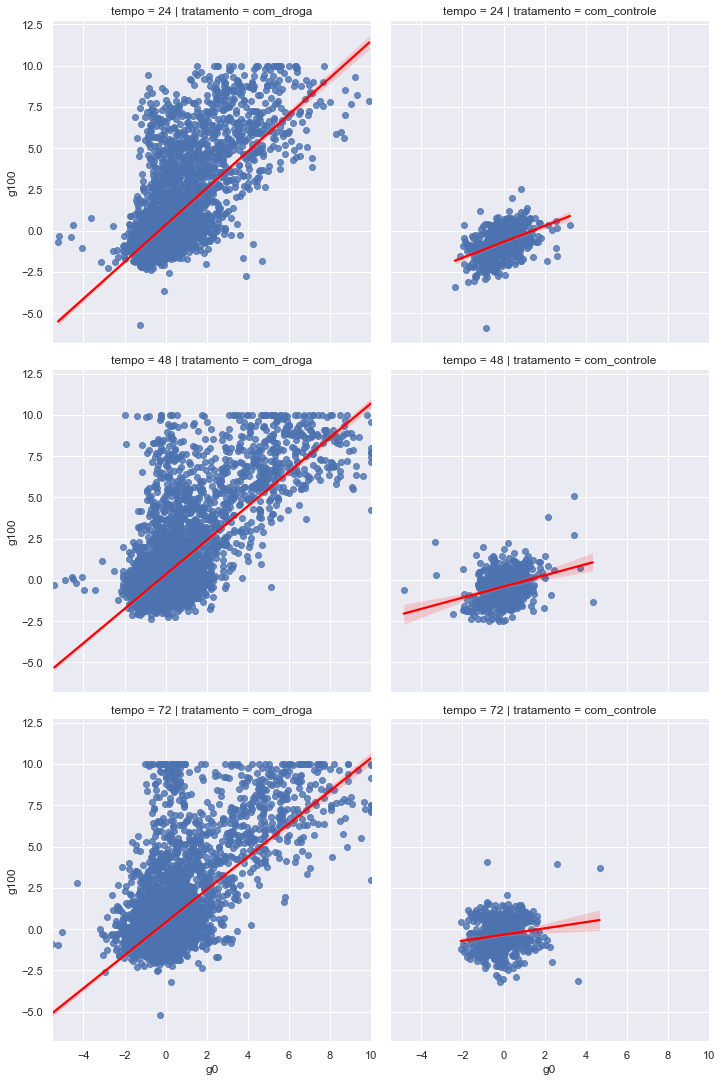

In [16]:
sns.lmplot(data=experimentos, x='g0', y='g100', line_kws={'color':'red'}, col='tratamento', row='tempo')
plt.show()

### Correlação representada pelo coeficiente de correlação de Pearson

C -1: Correlação negativa

C 1: Correlação positiva 

C 0: Correlação inexistente 

In [17]:
correlacao = experimentos.loc[:,'g0':'g771'].corr() #Calcula a correlação entre todos os genes

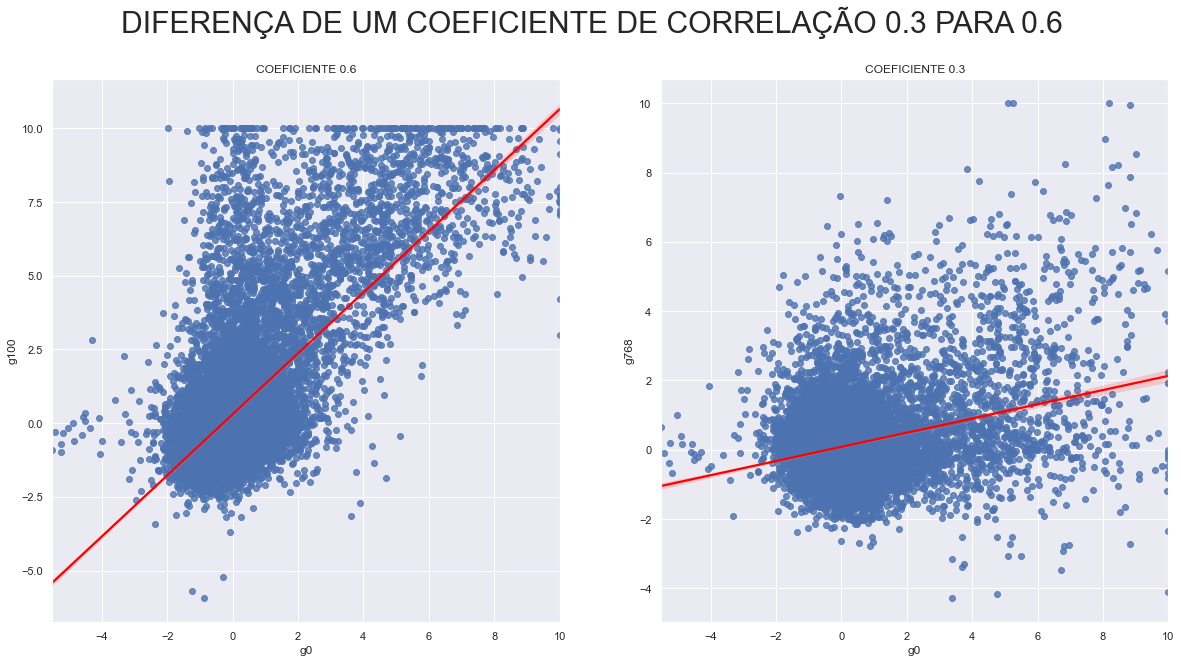

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10)) 
# fig: variável que armazena as características da figura total (figura com tamanho 720x576)
# ax: variável que armazena os subplots.

fig.suptitle('DIFERENÇA DE UM COEFICIENTE DE CORRELAÇÃO 0.3 PARA 0.6', fontsize=30)
g0_g100_scatter = sns.regplot(data=experimentos, x='g0', y='g100', line_kws={'color':'red'}, ax=ax1)
g0_g100_scatter.set(xlabel='g0', ylabel='g100', title='COEFICIENTE 0.6')

g0_g768_scatter = sns.regplot(data=experimentos, x='g0', y='g768', line_kws={'color':'red'})
g0_g768_scatter.set(xlabel='g0', ylabel='g768', title='COEFICIENTE 0.3')
plt.show()

## Desafio 5 - Calcular a correlação entre G e C

In [19]:
genes = experimentos[experimentos['tratamento'] == 'com_droga'].loc[:,'g0':'g49']
celulas = experimentos[experimentos['tratamento'] == 'com_droga'].loc[:,'c0':'c49']

In [27]:
genes_celulas = pd.concat([genes,celulas],axis=1) #axis = 1 para juntar por coluna
genes_celulas = genes_celulas.corr()
genes_celulas = genes_celulas.filter(like='c')
genes_celulas = genes_celulas.loc['g0':'g49']
#genes_celulas

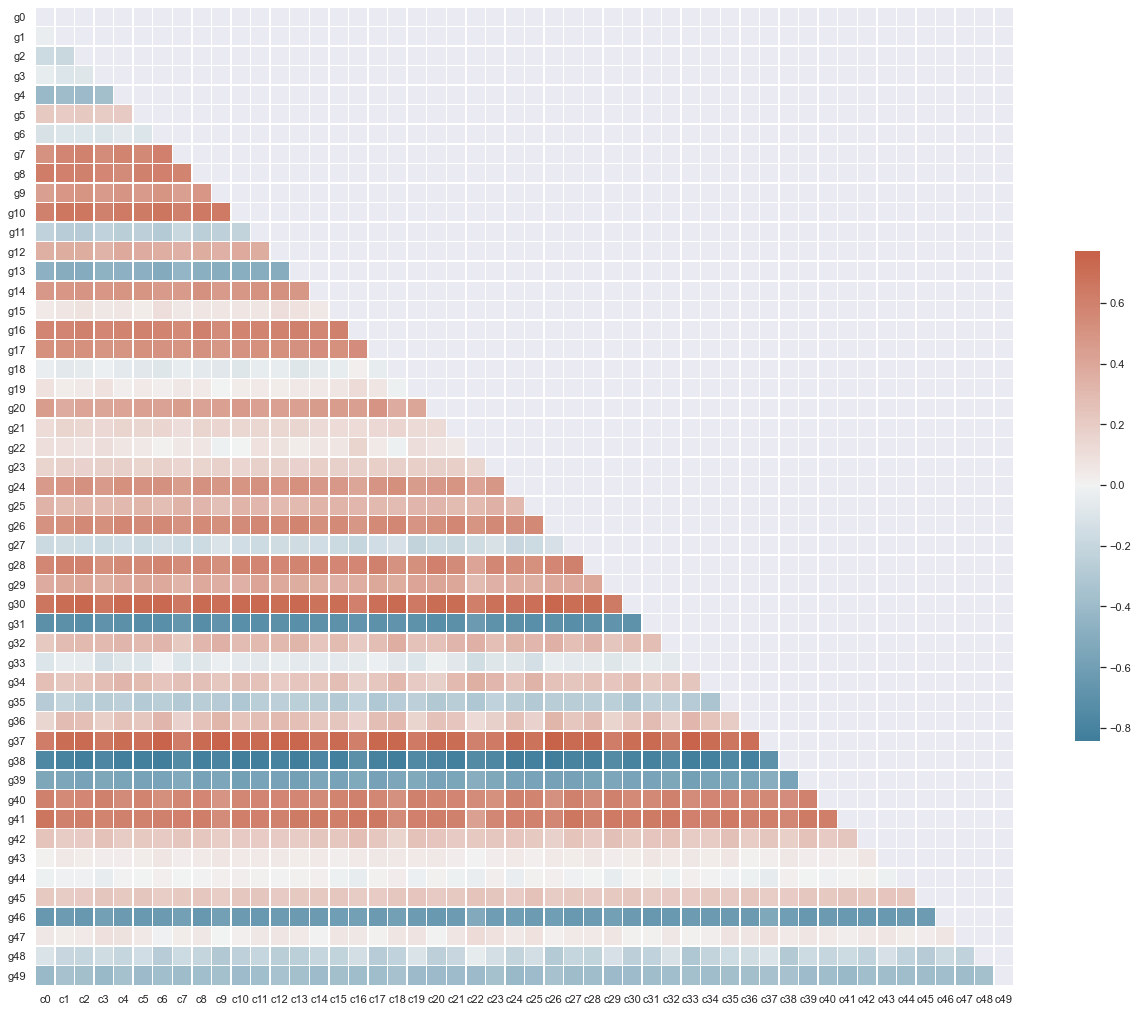

In [30]:
import numpy as np
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(genes_celulas, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(genes_celulas, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=0)
plt.show()

Com essa matriz de correlação é possível perceber que os genes 8, 10, 30 e 37 possuem uma alta correlação positiva com todos os tipos celulares enquanto os genes 13, 31 e 38 possuem um alto índice de correlação negativo.

## Desafio 7 - Resumo

* A correlação entre os genes das culturas em que os compostos foram usados aumentam se comparado com a correlação em que as culturas foram controladas.
* Certos genes apresentam uma correlação positiva com todos os tipos celulares ao serem submetidos aos compostos.